# Parcial – Data Wrangling y EDA

# Importación de librerías y carga de datos

- `winequality-red.csv`
- `winequality-white.csv`
- `winequality.names`

In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

# Ruta local
ruta = r'D:/Carpetas Daniela/Downloads/Wine/'

file_red = os.path.join(ruta, 'winequality-red.csv')
file_white = os.path.join(ruta, 'winequality-white.csv')

# Cargamos los dataset (UCI usa ; como separador)
df_red = pd.read_csv(file_red, sep=';')
df_white = pd.read_csv(file_white, sep=';')

# Añadir columna tipo de vino
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'

# Unir dataset
df = pd.concat([df_red, df_white], ignore_index=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Normalizacion de Columnas

In [66]:
df.columns = [c.lower().strip().replace(" ", "_") for c in df.columns]
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

# Validación de Tipos de Datos

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


La columna wine_type. La convertimos en categoría:

In [68]:
df['wine_type'] = df['wine_type'].astype('category')

# Validacion de datos nulos

In [69]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

El dataset no presenta valores faltantes

Duplicados

In [70]:
if duplicados > 0:
    df = df.drop_duplicates()

In [71]:
duplicados = df.duplicated().sum()
duplicados

np.int64(1177)

## Distribución del tipo de vino

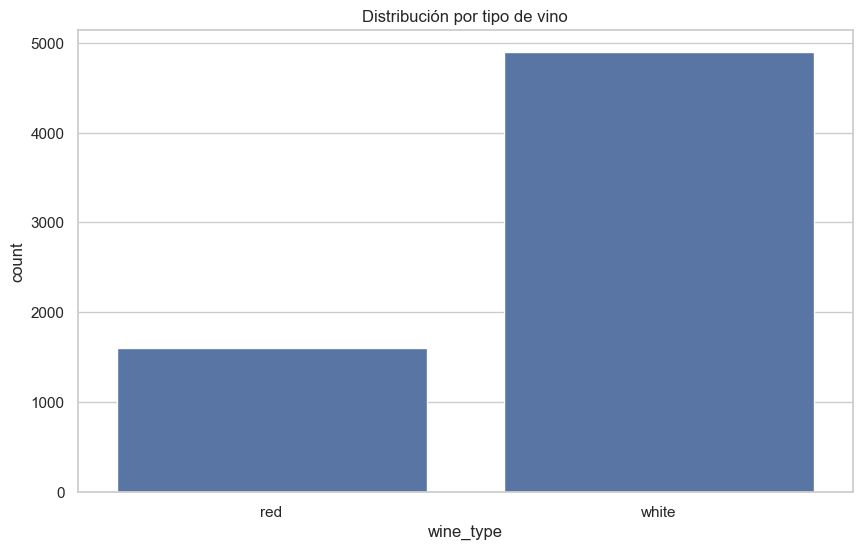

In [72]:
sns.countplot(x='wine_type', data=df)
plt.title("Distribución por tipo de vino")
plt.show()

## Alcohol

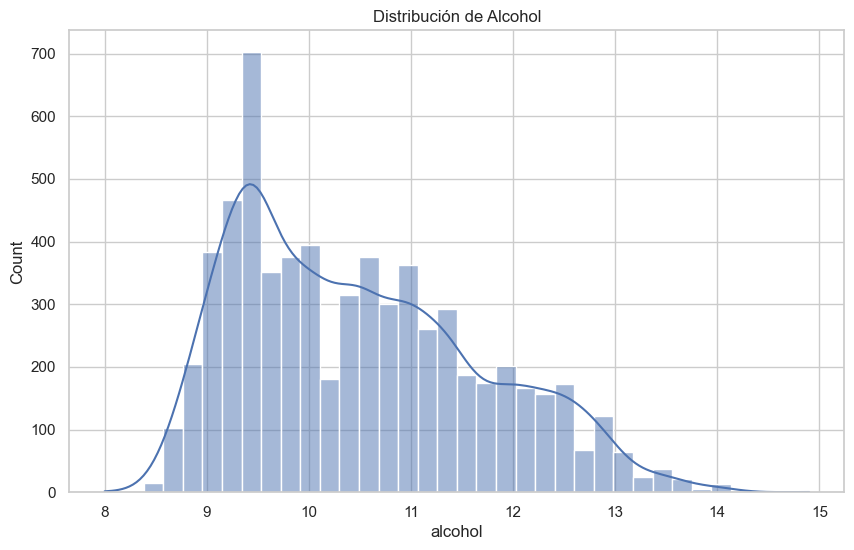

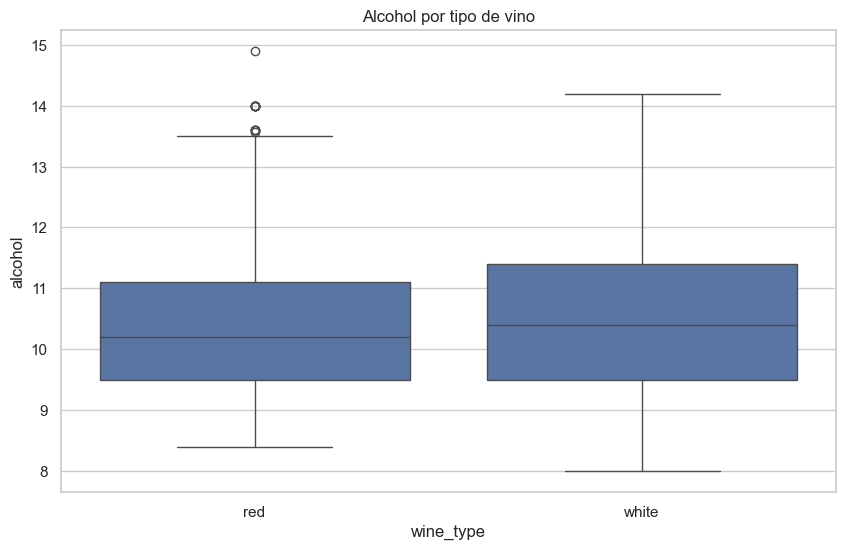

In [73]:
sns.histplot(df['alcohol'], kde=True)
plt.title("Distribución de Alcohol")
plt.show()

sns.boxplot(x='wine_type', y='alcohol', data=df)
plt.title("Alcohol por tipo de vino")
plt.show()

## Acidez (volatile acidity)

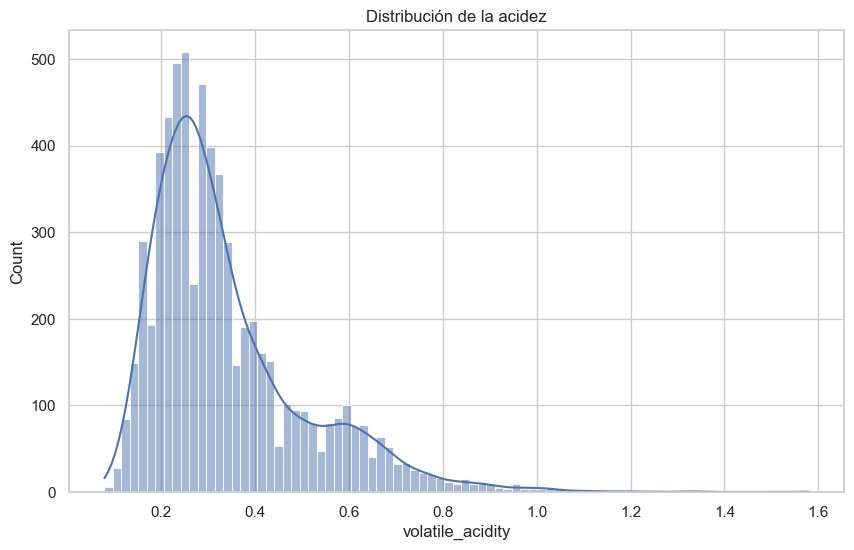

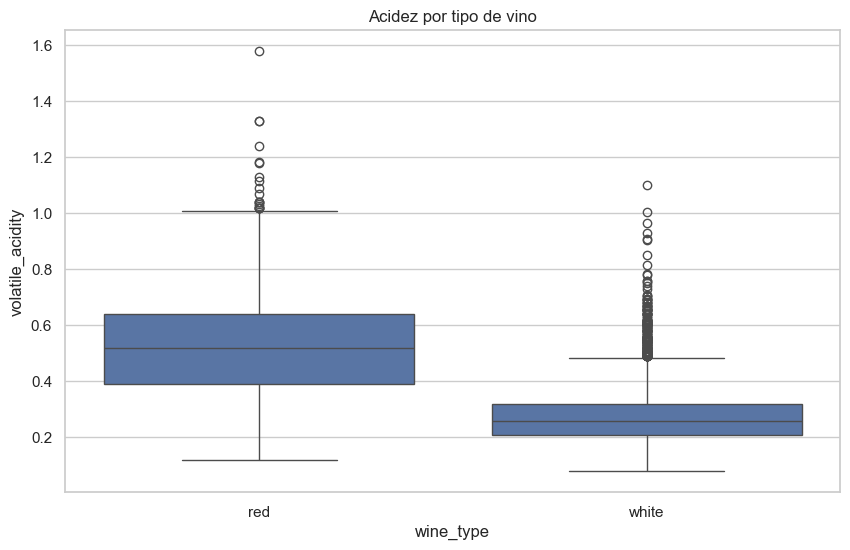

In [74]:
df['volatile_acidity'].describe()

sns.histplot(df['volatile_acidity'], kde=True)
plt.title("Distribución de la acidez")
plt.show()

sns.boxplot(x='wine_type', y='volatile_acidity', data=df)
plt.title("Acidez por tipo de vino")
plt.show()

## Azúcar residual

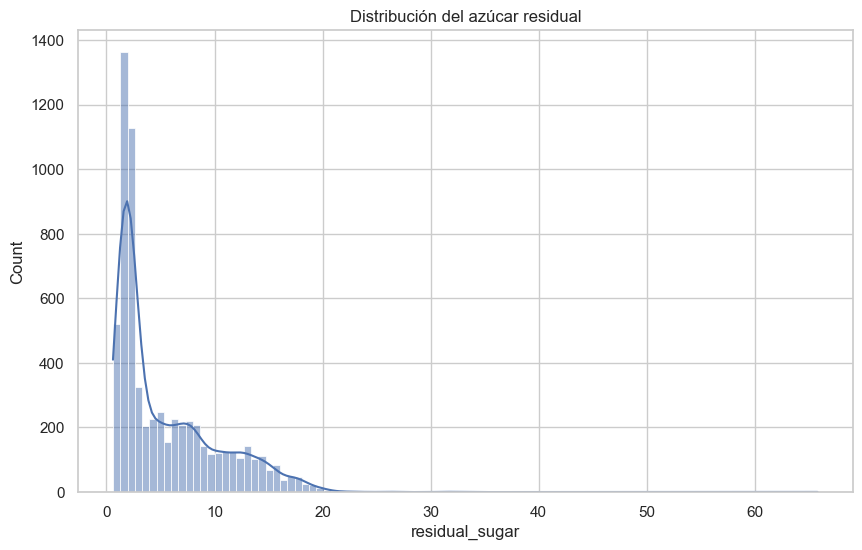

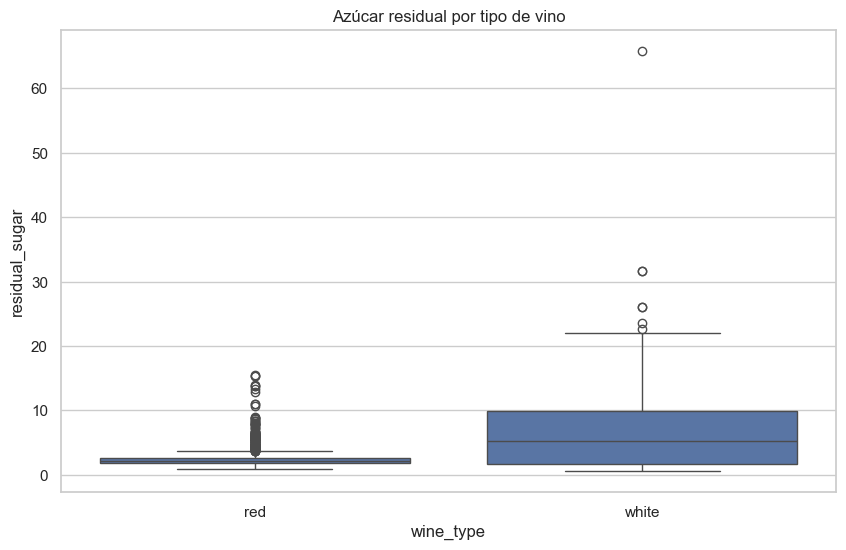

In [75]:
df['residual_sugar'].describe()

sns.histplot(df['residual_sugar'], kde=True)
plt.title("Distribución del azúcar residual")
plt.show()

sns.boxplot(x='wine_type', y='residual_sugar', data=df)
plt.title("Azúcar residual por tipo de vino")
plt.show()

## Matriz de correlación

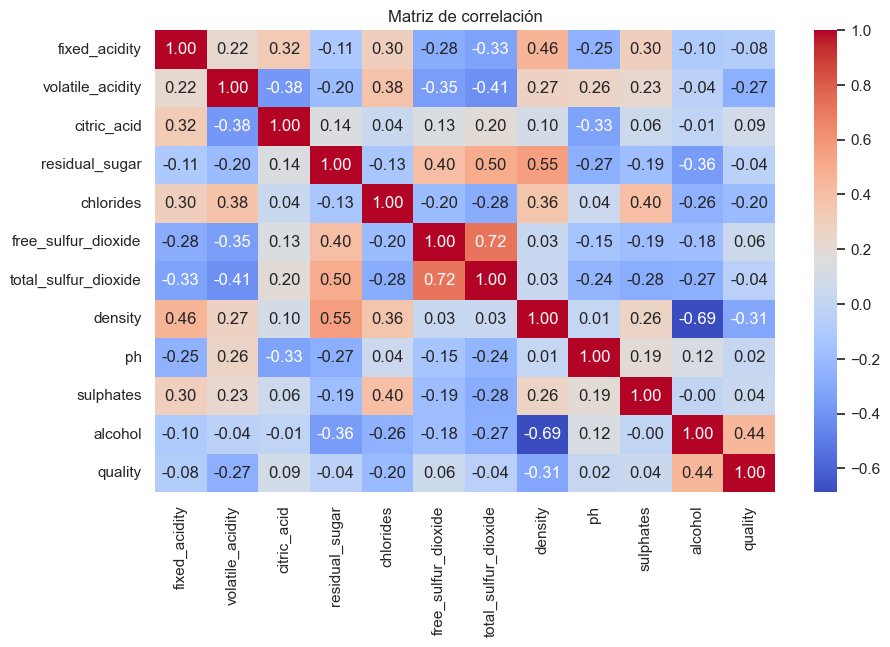

In [76]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

## Conclusiones 

Conclusiones Data Wrangling
* En este dataset no existen valores nulos.
* Se eliminaron duplicados
* Se normalizaron columnas limpiaron espacios.

Conclusiones EDA
* Los vinos rojos tienen mayor acidez.
* Los vinos blancos tienen notoriamente más azúcar residual.
* El nivel de alcohol es mas alto en los vinos blancos
* La matriz de correlación muestra que el nivel de alcohol es la variable que más influye en la calidad del vino.